In [2]:
import pandas as pd

In [191]:
clinics = pd.read_pickle('AllClinics_08052024.pkl')

In [58]:
data = pd.read_pickle('Filtered_AllClinics_27052024.pkl')

In [59]:
data.drop('Treatment Start Date', axis=1)

,Clinic,PatientIdentifier,Cycle Number,Age at Egg Collection,BMI,Weight_kg,Height_cm,Ethnicity,Infertility Diagnosis,Treatment Name,...,protocol_map,median_size,mean_size,mean_vol_size,13_18mm,Infertility Diagnosis Type,Ethnicity Category,Ethnicity Subcategory,Downreg Drug Detail,os_init_dose
0,WFC,76786,TX97,20.0,-1.00,-1.0,NaN,Arab,pco,IVF,...,SHORT,-1.0,-1.0,-1.0,-1,Ovulatory,Other,Middle Eastern,"[[Ganirelix, 2010-11-21 00:00:00, mcg, 250.0],...",300.0
1,WFC,76786,TX18648,21.0,-1.00,-1.0,NaN,Arab,anovulation,IVF,...,NONE,-1.0,-1.0,-1.0,-1,Ovulatory,Other,Middle Eastern,NaN,NaN
2,WFC,76786,TX3,20.0,-1.00,-1.0,NaN,Arab,pco,IVF,...,LONG,-1.0,-1.0,-1.0,-1,Ovulatory,Other,Middle Eastern,"[[Buserelin injection, NaT, mcg, 500.0], [Buse...",300.0
3,WFC,76786,TX38406,30.0,-1.00,-1.0,NaN,Arab,nan,ICSI,...,NONE,-1.0,-1.0,-1.0,-1,Unexplained,Other,Middle Eastern,NaN,NaN
4,WFC,76786,TX7,20.0,-1.00,-1.0,NaN,Arab,pco,ICSI,...,NONE,13.0,13.9,1440.5,29,Ovulatory,Other,Middle Eastern,NaN,225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108762,BELF,GCRMB-112474,GCRMB-293052,44.7,27.82,73.0,162.0,-,-,Fresh treatment,...,LONG,-1.0,-1.0,-1.0,-1,Unexplained,Unknown,Unknown,NaN,NaN
108763,THVF,TVF-139971,TVF-308437,38.0,-1.00,-1.0,-1.0,-,-,Fresh Treatment,...,SHORT,-1.0,-1.0,-1.0,-1,Unexplained,Unknown,Unknown,NaN,NaN
108764,OXFD,OF-171591,OF-220895,31.2,-1.00,-1.0,-1.0,-,-,Fresh treatment,...,SHORT,-1.0,-1.0,-1.0,-1,Unexplained,Unknown,Unknown,NaN,NaN
108765,CMM,CMM-101869,CMM-18882,38.0,-1.00,-1.0,-1.0,-,Zachowanie plodnosci,Mrozenie oocytów,...,SHORT,-1.0,-1.0,-1.0,-1,Cancer,Unknown,Unknown,NaN,300.0


In [60]:
# one hot encode the infertility diagnosis and ethnicity category
data['Infertility Diagnosis Type'] = data['Infertility Diagnosis Type'].replace('Uterine, Cervical and Pelvic', 'Uterine, Cervical or Pelvic')
data['Infertility Diagnosis Type']

0           Ovulatory
1           Ovulatory
2           Ovulatory
3         Unexplained
4           Ovulatory
             ...     
108762    Unexplained
108763    Unexplained
108764    Unexplained
108765         Cancer
108766    Unexplained
Name: Infertility Diagnosis Type, Length: 108767, dtype: object

### One-Hot Encoding Infertility Diagnosis

In [61]:
df_encoded = pd.get_dummies(data, columns=['Infertility Diagnosis Type'], prefix=['Diag'])

# Print the DataFrame after one-hot encoding
print("\nDataFrame after One-Hot Encoding:")
print(df_encoded['Diag_Cancer'])


DataFrame after One-Hot Encoding:
0         False
1         False
2         False
3         False
4         False
          ...  
108762    False
108763    False
108764    False
108765     True
108766    False
Name: Diag_Cancer, Length: 108767, dtype: bool


In [62]:
df_encoded

,Clinic,PatientIdentifier,Cycle Number,Treatment Start Date,Age at Egg Collection,BMI,Weight_kg,Height_cm,Ethnicity,Infertility Diagnosis,...,Diag_Cancer,Diag_Endocrine,Diag_Genetic,Diag_Male Factor,Diag_Other,Diag_Ovarian,Diag_Ovulatory,Diag_Tubal,Diag_Unexplained,"Diag_Uterine, Cervical or Pelvic"
0,WFC,76786,TX97,2010-11-17,20.0,-1.00,-1.0,NaN,Arab,pco,...,False,False,False,False,False,False,True,False,False,False
1,WFC,76786,TX18648,2011-03-23,21.0,-1.00,-1.0,NaN,Arab,anovulation,...,False,False,False,False,False,False,True,False,False,False
2,WFC,76786,TX3,2010-04-15,20.0,-1.00,-1.0,NaN,Arab,pco,...,False,False,False,False,False,False,True,False,False,False
3,WFC,76786,TX38406,2021-01-01,30.0,-1.00,-1.0,NaN,Arab,nan,...,False,False,False,False,False,False,False,False,True,False
4,WFC,76786,TX7,2010-06-11,20.0,-1.00,-1.0,NaN,Arab,pco,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108762,BELF,GCRMB-112474,GCRMB-293052,2023-10-11,44.7,27.82,73.0,162.0,-,-,...,False,False,False,False,False,False,False,False,True,False
108763,THVF,TVF-139971,TVF-308437,2023-10-12,38.0,-1.00,-1.0,-1.0,-,-,...,False,False,False,False,False,False,False,False,True,False
108764,OXFD,OF-171591,OF-220895,2023-10-15,31.2,-1.00,-1.0,-1.0,-,-,...,False,False,False,False,False,False,False,False,True,False
108765,CMM,CMM-101869,CMM-18882,2023-10-18,38.0,-1.00,-1.0,-1.0,-,Zachowanie plodnosci,...,True,False,False,False,False,False,False,False,False,False


In [63]:
df_encoded = pd.get_dummies(df_encoded, columns=['Ethnicity Category'], prefix='Eth', dtype=float)
df_encoded

,Clinic,PatientIdentifier,Cycle Number,Treatment Start Date,Age at Egg Collection,BMI,Weight_kg,Height_cm,Ethnicity,Infertility Diagnosis,...,Diag_Ovulatory,Diag_Tubal,Diag_Unexplained,"Diag_Uterine, Cervical or Pelvic",Eth_Asian,Eth_Black,Eth_Mixed,Eth_Other,Eth_Unknown,Eth_White
0,WFC,76786,TX97,2010-11-17,20.0,-1.00,-1.0,NaN,Arab,pco,...,True,False,False,False,0.0,0.0,0.0,1.0,0.0,0.0
1,WFC,76786,TX18648,2011-03-23,21.0,-1.00,-1.0,NaN,Arab,anovulation,...,True,False,False,False,0.0,0.0,0.0,1.0,0.0,0.0
2,WFC,76786,TX3,2010-04-15,20.0,-1.00,-1.0,NaN,Arab,pco,...,True,False,False,False,0.0,0.0,0.0,1.0,0.0,0.0
3,WFC,76786,TX38406,2021-01-01,30.0,-1.00,-1.0,NaN,Arab,nan,...,False,False,True,False,0.0,0.0,0.0,1.0,0.0,0.0
4,WFC,76786,TX7,2010-06-11,20.0,-1.00,-1.0,NaN,Arab,pco,...,True,False,False,False,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108762,BELF,GCRMB-112474,GCRMB-293052,2023-10-11,44.7,27.82,73.0,162.0,-,-,...,False,False,True,False,0.0,0.0,0.0,0.0,1.0,0.0
108763,THVF,TVF-139971,TVF-308437,2023-10-12,38.0,-1.00,-1.0,-1.0,-,-,...,False,False,True,False,0.0,0.0,0.0,0.0,1.0,0.0
108764,OXFD,OF-171591,OF-220895,2023-10-15,31.2,-1.00,-1.0,-1.0,-,-,...,False,False,True,False,0.0,0.0,0.0,0.0,1.0,0.0
108765,CMM,CMM-101869,CMM-18882,2023-10-18,38.0,-1.00,-1.0,-1.0,-,Zachowanie plodnosci,...,False,False,False,False,0.0,0.0,0.0,0.0,1.0,0.0


In [64]:
df_encoded.columns

Index(['Clinic', 'PatientIdentifier', 'Cycle Number', 'Treatment Start Date',
       'Age at Egg Collection', 'BMI', 'Weight_kg', 'Height_cm', 'Ethnicity',
       'Infertility Diagnosis', 'Treatment Name', 'Trigger Date',
       'Egg Collection Date', 'No. Eggs Collected', 'No. Mature Eggs',
       'No. 2PNs', 'No. Suitable Blastocysts', 'No. Embryos Transferred',
       'Transfer Date', 'Pregnancy Outcome', 'Pregnancy Achieved?',
       'AFC_result', 'amh_value', 'protocol_map', 'median_size', 'mean_size',
       'mean_vol_size', '13_18mm', 'Ethnicity Subcategory',
       'Downreg Drug Detail', 'os_init_dose', 'Diag_Cancer', 'Diag_Endocrine',
       'Diag_Genetic', 'Diag_Male Factor', 'Diag_Other', 'Diag_Ovarian',
       'Diag_Ovulatory', 'Diag_Tubal', 'Diag_Unexplained',
       'Diag_Uterine, Cervical or Pelvic', 'Eth_Asian', 'Eth_Black',
       'Eth_Mixed', 'Eth_Other', 'Eth_Unknown', 'Eth_White'],
      dtype='object')

In [65]:
df_encoded = df_encoded.drop(['Trigger Date', 'Egg Collection Date', 'Transfer Date'], axis=1)

In [66]:
df_encoded = df_encoded.drop(['Pregnancy Outcome'], axis=1)

In [67]:
df_encoded

,Clinic,PatientIdentifier,Cycle Number,Treatment Start Date,Age at Egg Collection,BMI,Weight_kg,Height_cm,Ethnicity,Infertility Diagnosis,...,Diag_Ovulatory,Diag_Tubal,Diag_Unexplained,"Diag_Uterine, Cervical or Pelvic",Eth_Asian,Eth_Black,Eth_Mixed,Eth_Other,Eth_Unknown,Eth_White
0,WFC,76786,TX97,2010-11-17,20.0,-1.00,-1.0,NaN,Arab,pco,...,True,False,False,False,0.0,0.0,0.0,1.0,0.0,0.0
1,WFC,76786,TX18648,2011-03-23,21.0,-1.00,-1.0,NaN,Arab,anovulation,...,True,False,False,False,0.0,0.0,0.0,1.0,0.0,0.0
2,WFC,76786,TX3,2010-04-15,20.0,-1.00,-1.0,NaN,Arab,pco,...,True,False,False,False,0.0,0.0,0.0,1.0,0.0,0.0
3,WFC,76786,TX38406,2021-01-01,30.0,-1.00,-1.0,NaN,Arab,nan,...,False,False,True,False,0.0,0.0,0.0,1.0,0.0,0.0
4,WFC,76786,TX7,2010-06-11,20.0,-1.00,-1.0,NaN,Arab,pco,...,True,False,False,False,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108762,BELF,GCRMB-112474,GCRMB-293052,2023-10-11,44.7,27.82,73.0,162.0,-,-,...,False,False,True,False,0.0,0.0,0.0,0.0,1.0,0.0
108763,THVF,TVF-139971,TVF-308437,2023-10-12,38.0,-1.00,-1.0,-1.0,-,-,...,False,False,True,False,0.0,0.0,0.0,0.0,1.0,0.0
108764,OXFD,OF-171591,OF-220895,2023-10-15,31.2,-1.00,-1.0,-1.0,-,-,...,False,False,True,False,0.0,0.0,0.0,0.0,1.0,0.0
108765,CMM,CMM-101869,CMM-18882,2023-10-18,38.0,-1.00,-1.0,-1.0,-,Zachowanie plodnosci,...,False,False,False,False,0.0,0.0,0.0,0.0,1.0,0.0


## Model Implementation

### Preprocess the data

### Impute BMIs

In [68]:
import math

def calculate_bmi(height_cm: float, weight_kg: float) -> float:
    """
    Calculates the BMI value of a patient based on their `Height_cm` and `Weight_kg` values.

    Parameters:
    height_cm (float): The height of the patient in centimeters.
    weight_kg (float): The weight of the patient in kilograms.

    Returns:
    float: The BMI value of the patient.
    """
    if height_cm > 0 and weight_kg > 0:
        bmi = weight_kg / (height_cm / 100) ** 2
        return round(bmi, 2)
    else:
        return math.nan


# Calculate the BMI value for each patient
df_encoded['BMI_value'] = df_encoded.apply(lambda row: calculate_bmi(row['Height_cm'], row['Weight_kg']), axis=1)

In [69]:
df_encoded = df_encoded[(df_encoded['Age at Egg Collection'] >= 18) & (df_encoded['Age at Egg Collection'] <= 50)]
df_encoded = df_encoded[(df_encoded['BMI_value'] >= 18) & (df_encoded['BMI'] <= 50)]
df_encoded = df_encoded[(df_encoded['amh_value'] > 0 )]
df_encoded = df_encoded[(df_encoded['os_init_dose'] > 25 ) & (df_encoded['os_init_dose'] <= 450)]

In [70]:
len(df_encoded)

10408

In [71]:
# Columns you are interested in
columns_of_interest = [
    'Diag_Cancer', 'Diag_Endocrine', 'Diag_Genetic', 'Diag_Male Factor', 'Diag_Other',
    'Diag_Ovarian', 'Diag_Ovulatory', 'Diag_Tubal', 'Diag_Unexplained', 'Diag_Uterine, Cervical or Pelvic'
]

# Check each column and drop if it contains any values other than 0 or 1
for column in columns_of_interest:
    if not pd.Series(df_encoded[column]).isin([0, 1]).all():  # Check if all entries are 0 or 1
        df_encoded.drop(column, axis=1, inplace=True)  # Drop the column if condition is not met


In [72]:
df_encoded

,Clinic,PatientIdentifier,Cycle Number,Treatment Start Date,Age at Egg Collection,BMI,Weight_kg,Height_cm,Ethnicity,Infertility Diagnosis,...,Diag_Tubal,Diag_Unexplained,"Diag_Uterine, Cervical or Pelvic",Eth_Asian,Eth_Black,Eth_Mixed,Eth_Other,Eth_Unknown,Eth_White,BMI_value
46556,BOST,BOSTON-34153,BOSTON-24196,2013-08-23,39.8,20.44,73.0,189.0,-,Low Sperm Count,...,False,False,False,0.0,0.0,0.0,0.0,1.0,0.0,20.44
47443,BOST,BOSTON-34291,BOSTON-24262,2013-10-17,29.3,20.78,48.0,152.0,-,Polycystic Ovarian Disease,...,False,False,False,0.0,0.0,0.0,0.0,1.0,0.0,20.78
48106,BOST,BOSTON-34543,BOSTON-24327,2013-11-21,34.5,36.00,91.0,159.0,-,Unexplained,...,False,True,False,0.0,0.0,0.0,0.0,1.0,0.0,36.00
48553,BOST,BOSTON-34626,BOSTON-24422,2014-01-06,37.9,19.47,48.0,157.0,-,Unexplained,...,False,True,False,0.0,0.0,0.0,0.0,1.0,0.0,19.47
48626,BOST,BOSTON-34514,BOSTON-24367,2014-01-09,34.3,24.24,66.0,165.0,-,Sperm Motility,...,False,False,False,0.0,0.0,0.0,0.0,1.0,0.0,24.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108703,SIMP,SF-74664,SF-1171842,2023-09-20,35.5,34.15,81.0,154.0,-,-,...,False,True,False,0.0,0.0,0.0,0.0,1.0,0.0,34.15
108710,BELF,GCRMB-118309,GCRMB-293211,2023-09-22,37.2,28.96,76.0,162.0,White Irish,-,...,False,True,False,0.0,0.0,0.0,0.0,0.0,1.0,28.96
108712,BELF,GCRMB-120188,GCRMB-293183,2023-09-22,40.2,22.77,54.0,154.0,Irish,-,...,False,True,False,0.0,0.0,0.0,0.0,0.0,1.0,22.77
108724,SIMP,SF-74741,SF-1171783,2023-09-26,40.1,31.89,90.0,168.0,(A) White - British,-,...,False,True,False,0.0,0.0,0.0,0.0,0.0,1.0,31.89


### Neural Network Implementation

### The number of patients per clinic is very different

In [38]:
clinic_counts = df_encoded['Clinic'].value_counts()

# Print the counts of patients per clinic
print(clinic_counts)


Clinic
GCRM    2908
BELF    1795
OXFD    1776
NURT    1443
WESX     902
SIMP     635
THVF     559
BOST     390
Name: count, dtype: int64


## 5-Layer Network with BayesOpt and Nested CV and graphs

Using cuda
Epoch 20: Training Loss: 33.8640                       
Epoch 40: Training Loss: 33.2676                       
Epoch 60: Training Loss: 32.9903                       
Epoch 20: Training Loss: 33.1070                                                
Epoch 40: Training Loss: 32.7474                                                
Epoch 60: Training Loss: 33.0044                                                
Epoch 20: Training Loss: 33.1520                                                
Epoch 40: Training Loss: 33.0627                                                
Epoch 60: Training Loss: 32.8684                                                
Epoch 20: Training Loss: 33.1883                                                
Epoch 40: Training Loss: 32.8584                                                
Epoch 60: Training Loss: 32.7967                                                
Epoch 20: Training Loss: 33.2358                                                 
Epoch 40: 

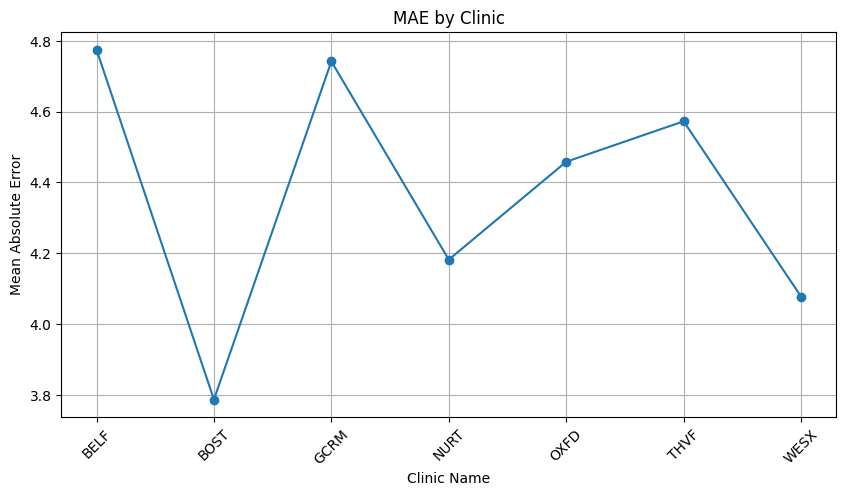

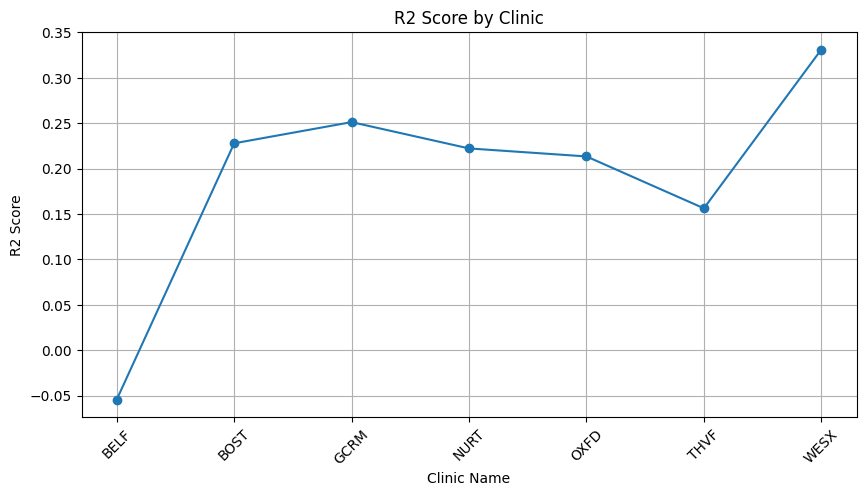

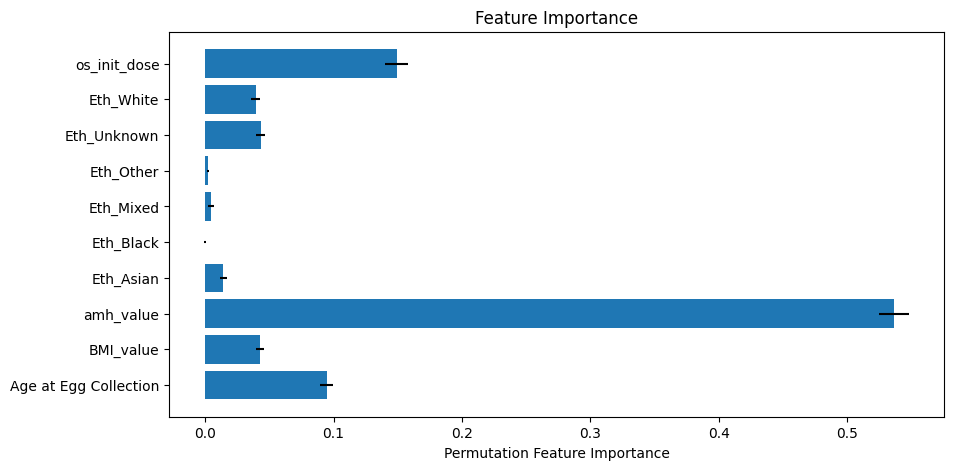

In [109]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.inspection import permutation_importance
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, RegressorMixin

filtered_df_eggs = filtered_df_eggs[filtered_df_eggs['Clinic'] != 'SIMP']

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using {device}')

X = filtered_df_eggs[['Age at Egg Collection', 'BMI_value', 'amh_value', 'Eth_Asian', 'Eth_Black', 'Eth_Mixed', 'Eth_Other', 'Eth_Unknown', 'Eth_White', 'os_init_dose']].values
y = filtered_df_eggs['No. Mature Eggs'].values.reshape(-1, 1)
by_clinic = filtered_df_eggs['Clinic'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)


class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(10, 64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 128)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(128, 1024)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(1024, 128)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(128, 1)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.relu4(self.fc4(x))
        return self.fc5(x)


space = {
    'lr': hp.loguniform('lr', np.log(0.0001), np.log(0.01)),
    'batch_size': hp.choice('batch_size', [32, 64, 128, 256]),
    'weight_decay': hp.loguniform('weight_decay', np.log(0.0001), np.log(0.01))
}

def objective(hyperparams):
    batch_size = hyperparams['batch_size']
    model = NeuralNet().to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=hyperparams['lr'], weight_decay=hyperparams['weight_decay'])

    train_data = TensorDataset(X_tensor, y_tensor)
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

    for epoch in range(75):
        model.train()
        total_loss = 0
        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * data.size(0)
        if (epoch + 1) % 20 == 0:
            print(f'Epoch {epoch + 1}: Training Loss: {total_loss / len(train_loader.dataset):.4f}')
    return {'loss': total_loss / len(train_loader), 'status': STATUS_OK}

trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials
)
best_batch_size = [32, 64, 128, 256][best['batch_size']]
best_weight_decay = best['weight_decay']
print(f"Best hyperparameters: LR={best['lr']}, Batch size={best_batch_size}, Weight Decay={best_weight_decay}")

logo = LeaveOneGroupOut()
maes, r2s, clinics = [], [], []

for train_idx, test_idx in logo.split(X_scaled, y, by_clinic):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    clinic_name = by_clinic[test_idx][0]

    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

    train_data = TensorDataset(X_train_tensor, y_train_tensor)
    test_data = TensorDataset(X_test_tensor, y_test_tensor)

    train_loader = DataLoader(train_data, batch_size=best_batch_size, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=best_batch_size, shuffle=False)

    model = NeuralNet().to(device)
    optimizer = optim.Adam(model.parameters(), lr=best['lr'], weight_decay=best_weight_decay)
    criterion = nn.MSELoss()

    model.train()
    for epoch in range(75):
        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

    model.eval()
    predictions = []
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            predictions.append(output.cpu().numpy())

    predictions = np.vstack(predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    maes.append(mae)
    r2s.append(r2)
    clinics.append(clinic_name)

# Plotting results as line plots
def plot_results(clinics, scores, title, ylabel):
    plt.figure(figsize=(10, 5))
    plt.plot(clinics, scores, marker='o', linestyle='-')
    plt.xlabel('Clinic Name')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

plot_results(clinics, maes, 'MAE by Clinic', 'Mean Absolute Error')
plot_results(clinics, r2s, 'R2 Score by Clinic', 'R2 Score')

# Define custom estimator class
class NeuralNetEstimator(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        return self

    def predict(self, X):
        X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
        self.model.eval()
        with torch.no_grad():
            predictions = self.model(X_tensor)
        return predictions.cpu().numpy()

# Use the last trained model for permutation importance
model.eval()
estimator = NeuralNetEstimator(model)

# Calculating permutation feature importance on the entire dataset
r = permutation_importance(estimator, X_scaled, y, n_repeats=30, random_state=0)

plt.figure(figsize=(10, 5))
plt.barh(range(X.shape[1]), r.importances_mean, xerr=r.importances_std)
plt.yticks(range(X.shape[1]), ['Age at Egg Collection', 'BMI_value', 'amh_value', 'Eth_Asian', 'Eth_Black', 'Eth_Mixed', 'Eth_Other', 'Eth_Unknown', 'Eth_White', 'os_init_dose'])
plt.xlabel("Permutation Feature Importance")
plt.title("Feature Importance")
plt.show()


In [110]:
mae

4.077793482166008

### So our average MAE is 4.0779 ~ 4.08

In [118]:
r2

0.33105581512696325

### Mean R2 value is 0.331